In [83]:
import glob
import re
import os
import pandas as pd
import shutil
from 過去のコード.Mecab_func import *
import random
import numpy as np
import matplotlib as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [51]:
#csvから、日付を読み込み、その日付と一致するファイルをglob➝shutil.copy

date_df=pd.read_csv('../Excel/import_to_df2.csv')
date_df.head()
aproval=date_df['1'].tolist()
disaproval=date_df['3'].tolist()
print(aproval)
print(disaproval)

for i in range(len(aproval)):
    aproval_files=glob.glob(f'../Docments/Abe_speech4/{aproval[i]}*')
    print(aproval_files)
    for file in aproval_files:
        copy_file=re.sub(r'.+\\','',file)
        copy_file='../Docments/Abe_speech4/aproval_list/'+copy_file
#         print(copy_file)
#         shutil.copy(file,copy_file)
    
for i in range(len(disaproval)):
    disaproval_files=glob.glob(f'../Docments/Abe_speech4/{disaproval[i]}*')
    print(disaproval_files)
    for file in disaproval_files:
        copy_file=re.sub(r'.+\\','',file)
        copy_file='../Docments/Abe_speech4/disaproval_list/'+copy_file
#         print(copy_file)
#         shutil.copy(file,copy_file)    

['2018-06-01', '2015-08-01', '2016-12-01', '2016-10-01', '2015-03-01', '2017-07-01', '2016-01-01', '2015-01-01', '2014-07-01', '2014-04-01']
['2017-06-01', '2013-11-01', '2015-02-01', '2014-10-01', '2017-02-01', '2016-09-01', '2015-06-01', '2018-03-01', '2014-09-01', '2016-11-01']
['../Docments/Abe_speech4\\2018-06-01_1.txt', '../Docments/Abe_speech4\\2018-06-01_2.txt']
['../Docments/Abe_speech4\\2015-08-01_1.txt', '../Docments/Abe_speech4\\2015-08-01_2.txt', '../Docments/Abe_speech4\\2015-08-01_3.txt', '../Docments/Abe_speech4\\2015-08-01_4.txt']
['../Docments/Abe_speech4\\2016-12-01_1.txt']
['../Docments/Abe_speech4\\2016-10-01_1.txt', '../Docments/Abe_speech4\\2016-10-01_2.txt', '../Docments/Abe_speech4\\2016-10-01_3.txt', '../Docments/Abe_speech4\\2016-10-01_4.txt']
['../Docments/Abe_speech4\\2015-03-01_1.txt', '../Docments/Abe_speech4\\2015-03-01_2.txt', '../Docments/Abe_speech4\\2015-03-01_3.txt', '../Docments/Abe_speech4\\2015-03-01_4.txt', '../Docments/Abe_speech4\\2015-03-01_5

In [56]:
def Preprocessing(fname):
    Matubi=[]
    with open(fname,errors='ignore') as data_file:
                ftitle, fext = os.path.splitext(fname)
                fname_out=ftitle+'Prep.txt'
                #空白文字を削除する
                text_data=data_file.read()
                text_data=re.sub('.+　','',text_data)
                #改行で区切る
                text_data=re.sub('\n','',text_data)
                #句点で区切り、最後の要素を抜き取る
                text_data=text_data.split('。')
                with open(fname_out, mode='w',errors='ignore') as out_file:
                    for i,text in enumerate(text_data):
                        #読点以前を削除する
    #                     text=text.split('、')
                        #なぜか先頭に空白文字が入るので取り除く↓。
                        text=text.lstrip()
                        #読点以降のみが集まる↓
                        text+='。'
                        out_file.write(text)
                    

# new_mecab (r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech\2012-10-01.txt')    

for file in glob.glob(r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4/*/*.txt'):
#     Preprocessing(file)

In [60]:
for file in glob.glob(r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\*\*Prep.txt'):
    ftitle, fext = os.path.splitext(file)
    fname_out=ftitle+'.mecab'
#     to_mecab(file,fname_out)

In [200]:
def make_stopword():
    f = open("../docments/stopword.txt","r")
    list = []
    for x in f:
        list.append(x.rstrip("\n"))
        #以下のようにしてしまうと、改行コードがlistに入ってしまうため注意
        #list.append(x)
    f.close()
    return(list)

def make_lines(fname_parsed):#ジェネレーター
    with open(fname_parsed,errors='ignore') as file_parsed:
        morphemes = []
        for line in file_parsed:
            cols = line.split('\t')
            if(len(cols) < 2):
                raise StopIteration 
            res_cols = cols[1].split(',')

            morpheme = {
                'base': res_cols[6],
                'pos': res_cols[0],
            }
            morphemes.append(morpheme)
        
            if res_cols[1] == '句点':
                yield morphemes
                morphemes = []

                                
def count_morpheme(word_class,mecab_file):
    stopword=make_stopword()
    copus=[]
    #語数カウンター
    word_counter = Counter()
    for line in make_lines(mecab_file):
        for morpheme in line:
            if len(morpheme['base'])==1 or morpheme['base'] in stopword:
#             if len(morpheme['base'])==1:

                continue
            if morpheme['pos'] == word_class:
                copus.append(morpheme['base'])
    copus=''.join(str(copus))
    return(copus)                



In [201]:
copus=count_morpheme('名詞',r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\disaproval_list\2017-02-01_4Prep.mecab')
copus2=count_morpheme('名詞',r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\disaproval_list\2017-02-01_3Prep.mecab')
a=[]
a.append(count_morpheme('名詞',r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\disaproval_list\2017-02-01_4Prep.mecab'))
a.append(count_morpheme('名詞',r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\disaproval_list\2017-02-01_3Prep.mecab'))
# print(type(copus2))
print(a)


vectorizer = CountVectorizer()
docs=np.array(a)
X=vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names()
print(X)
print(feature_names)
print(vectorizer.vocabulary_)

c:\users\icech\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: generator 'make_lines' raised StopIteration


["['考え方', '全区', '岩場', '先ほど', 'ギャンブル依存症', 'IR', '推進', '審議', '過程', '対策', '重要性', '指摘', '附帯決議', '言及', '承知', '競馬', '競輪', '競艇', '等々', '指摘', '政府', 'ギャンブル', '依存症', '不幸', '状況', '対策', '肝要', '認識', 'そのため', '昨年末', '閣僚会議', '政府', '一体', 'ギャンブル', '依存症', '全般', '包括', '対策', '強力', '推進', '健全', '社会', '構築', '取り組み', '原発', '事情', '安全性', '最優先', '高位', '独立', '原子力規制委員会', '科学', '技術的', '審査', '世界', 'レベル', '規制', '基準', '適合', '原発', '判断', '尊重', '地元', '理解', '稼働', '政府', '一貫', '方針', '万が一', '事故', '政府', '国民', '生命', '身体', '財産', '重大', '責務', '原子力', '災害', '迅速', '対応', '事故', '拡大', '防止', '早急', '事態', '収束', '自衛隊', '警察', '消防', '海上保安庁', '組織', '各種', '支援', '住民', '避難', '支援', '物資', '円滑', '供給', '医師', '派遣', '円滑', '法令', '責任', '対処', '避難計画', '住民', '状況', '具体', '避難経路', '避難', '地域', '実情', '熟知', '地元', '自治体', '中心', '策定', '適切', '地元', '自治体', '原子力規制委員会', '作成', '原子力', '災害', '対策', '指針', '初期', '段階', '関与', '地域', '原子力', '防災', '協議', '自治体', '一体', '策定', '今後', '関与', '自治体', '避難計画', '継続', '強化', '考え', '事業者', '原発', '運転', '主体', '稼働', '判断', '安全', '運転', '責任', '万が一', '事故',

In [197]:
class Text_Learning:
    def __init__(self,path):
        self.path_list=glob.glob(path+r'\\*Prep.mecab')
        
    def get_docs(self,pos='動詞'):
        text_list=[]
        for file in self.path_list:
            text_list.append(count_morpheme(pos,file))
        
#         text_list=np.array(text_list)
        return text_list     
        
        

In [209]:
approval_path=r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\aproval_list'
disapproval_path=r'C:\Users\icech\Desktop\share\Lab\2018_09_05\Docments\Abe_speech4\disaproval_list'

approval=Text_Learning(approval_path)
disapproval=Text_Learning(disapproval_path)

app_docs=approval.get_docs('名詞')
dis_docs=disapproval.get_docs('名詞')

labels_app=np.ones(len(app_docs))
labels_dis=np.zeros(len(dis_docs))


print(len(app_docs),len(dis_docs))


c:\users\icech\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: generator 'make_lines' raised StopIteration


24 24


In [228]:
label=np.hstack((labels_app,labels_dis))
docs=np.array(app_docs+dis_docs)
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
TFvectorizer = TfidfVectorizer(use_idf=True,max_features=800,max_df=0.9,min_df=0.1)

tf_X = TFvectorizer.fit_transform(docs)
corpus2 = gensim.matutils.Dense2Corpus(docs)
dictionary=corpora.Dictionary([app_docs])
print(dictionary.doc2bow(docs))


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


48 48
----------------------------実装---------------------------
             precision    recall  f1-score   support

      支持率上昇       0.44      0.33      0.38        24
      支持率降下       0.47      0.58      0.52        24

avg / total       0.46      0.46      0.45        48



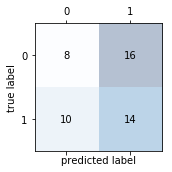

----------------------------------tf_idf実装---------------------------
             precision    recall  f1-score   support

      支持率上昇       0.53      0.42      0.47        24
      支持率降下       0.52      0.62      0.57        24

avg / total       0.52      0.52      0.52        48



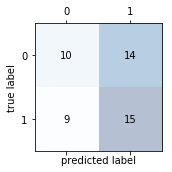

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
TFvectorizer = TfidfVectorizer(use_idf=True,max_features=800,max_df=0.9,min_df=0.1)


target_names=['支持率上昇','支持率降下']
data_features=['上昇','降下']

print(len(docs),len(label))
tf_X = TFvectorizer.fit_transform(docs)
X=vectorizer.fit_transform(docs)
clf = MultinomialNB()
y_pred=cross_val_predict(clf,X,label,cv=5)
tf_y_pred=cross_val_predict(clf,tf_X,label,cv=5)
print('----------------------------実装---------------------------')
print (classification_report(label,y_pred,target_names=target_names)) 


confmat=confusion_matrix(y_true=label,y_pred=y_pred)

fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')       
plt.ylabel('true label')     
plt.tight_layout()
plt.show()

print('----------------------------------tf_idf実装---------------------------')
print (classification_report(label,tf_y_pred,target_names=target_names))
confmat=confusion_matrix(y_true=label,y_pred=tf_y_pred)

fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')       
plt.ylabel('true label')     
plt.tight_layout()
plt.show()

